# CS345 Final Assignment

Name: Eric Martin

Date: May 2022

Institution Institution: Colorado State University

## SPAM E-mail Database Information

*The "spam" concept is diverse: advertisements for products/websites, make money fast schemes, chain letters, pornography... Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.*

    For background on spam:
    *Cranor, Lorrie F., LaMacchia, Brian A. Spam! Communications of the ACM, 41(8):74-83, 1998.*

Attribute Information:
*The last column denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occurring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.*

For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

* 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* 6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* 1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

* 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


**Author**: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt    
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/spambase)   
**Citation**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)


# Part 1: Importing Libraries and Understanding the Dataset

Libraries will be imported as needed throughout the notebook.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
import tensorflow as tf
tf.executing_eagerly()

%matplotlib inline

# import the following dataset from UCI Machine Learning Repository via OpenML
spam = fetch_openml(name='spambase', version=1)

Using TensorFlow backend.


### Elucidating Details of the Dataset:

As we can see from the output of the code below, there are 4601 data points each with 57 attributes/features.
The classes are 'spam' and 'not spam' so the dataset has a binary classification.


In [3]:
# using dataset with data_id = 44
print('spambase data ID is :', spam.details['id']) 
print('spambase data shape is :', spam.data.shape)  
print('spambase target shape is :', spam.target.shape)
print('spambase number of classes:', np.unique(spam.target))

# save details to a txt file
with open('spambase_details.txt', 'w') as f:
    f.write('spambase data ID is : ' + str(spam.details['id']) + '\n')
    f.write('spambase data shape is : ' + str(spam.data.shape) + '\n')
    f.write('spambase target shape is : ' + str(spam.target.shape) + '\n')
    f.write('spambase number of classes: ' + str(np.unique(spam.target)) + '\n')
    f.write('spambase details: ' + '\n' + str(spam.details) + '\n')

spambase data ID is : 44
spambase data shape is : (4601, 57)
spambase target shape is : (4601,)
spambase number of classes: ['0' '1']


#### The Attributes for Each Data Point (E-mail) are as Follows:

The dataset attributes mainly consist of specific word/character frequencies within the email. The number of capital letters and capital letter run lengths are also accouted for.

In [4]:
spam_features = [ 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
             'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
             'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
             'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
             'word_freq_george', 'word_freq_650',  'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
             'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',	
             'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',	
             'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
             'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']	

# Part 2: Splitting our Data into Test and Train Sets

In [5]:

    spam.data = preprocessing.normalize(spam.data) # normalize data
    target = spam.target # target
    data = spam.data # data

    X = data[:, :] # all rows, all columns except the last one
    y = target # classification labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # split data into training and testing sets

# Part 3: Multi-layer Perceptron using Keras

I will use Keras with a TensorFlow backend as it is simple to use and competitive with other options.

We will convert the input values to be 32 bit floating point values rather than 64 bit because most neural network packages use 32 bit floats to save on memory and computational cost.

In [6]:
X_mlp = X.astype('float32')
y_mlp = y.astype('float32')
X_train_mlp = X_train.astype('float32')
X_test_mlp = X_test.astype('float32')
y_train_mlp = y_train.astype('float32')
y_test_mlp = y_test.astype('float32')

### Setting up the sequential network model:

We will use a sequential network, which is the container for a multilayer perceptron/feedforward neural network structure.

    There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
        1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
        2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
        3. The number of hidden neurons should be less than twice the size of the input layer. 

*Kazemi, Somayeh. (2017). Re: How to decide the number of hidden layers and nodes in a hidden layer?. Retrieved from: https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer/5964fcae5b49528f9e7097da/citation/download.*


### Train the Network:
    The training parameters are described below. Since the classifiers in this dataset are 0 and 1 we can use the Binary Cross Entropy loss function. For the optimizer, Adam was chosen as it is great optimization alogrithm for stocahstic gradient descent. A three layer neural net was chosen for this problem with a hidden width of 39 (# of attributes * (2/3) + 1) and the number of epochs and batch size were chosen to both be 128.

> **Sources for the following code:*
CS345 Machine Learning Foundations and Practice at Colorado State University: Module06_02_neural_networks_keras - created by Asa Ben-Hur and Ross Beveridge

In [7]:
hidden_width = 39
accuracy_threshold = 0.915
instance  = 1
max_tries = 8
n_epochs = 128
batch_size = 128

while True:
    spam_network = keras.Sequential()
    spam_network.add(keras.layers.Dense(units=hidden_width, activation='relu', input_shape=(X.shape[1],)))
    spam_network.add(keras.layers.Dense(units=hidden_width, activation='relu'))
    spam_network.add(keras.layers.Dense(units=1, activation='sigmoid'))

    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    opt     = keras.optimizers.Adam()
    spam_network.compile(loss=loss_fn, optimizer=opt, metrics=['accuracy', 'mse'])
   
    history_spam = spam_network.fit(X_train_mlp, y_train_mlp, batch_size=batch_size, epochs=n_epochs, verbose=1)
    accu = history_spam.history['accuracy'][-1]
    print(f'Network instance {instance} achieved {accu:.5f}')
    instance += 1
    if history_spam.history['accuracy'][-1] >= accuracy_threshold :
        print(f'Found a network exceeding accuracy threshold {accuracy_threshold}')
        break
    if instance > max_tries : break


Epoch 1/128
2300/2300 [==============================] - 0s 95us/step - loss: 0.7698 - accuracy: 0.5930 - mse: 0.2432
Epoch 2/128
2300/2300 [==============================] - 0s 15us/step - loss: 0.7511 - accuracy: 0.6083 - mse: 0.2386
Epoch 3/128
2300/2300 [==============================] - 0s 16us/step - loss: 0.7293 - accuracy: 0.6083 - mse: 0.2546
Epoch 4/128
2300/2300 [==============================] - 0s 16us/step - loss: 0.7101 - accuracy: 0.6083 - mse: 0.2998
Epoch 5/128
2300/2300 [==============================] - 0s 14us/step - loss: 0.6997 - accuracy: 0.6083 - mse: 0.3416
Epoch 6/128
2300/2300 [==============================] - 0s 15us/step - loss: 0.6961 - accuracy: 0.6083 - mse: 0.3655
Epoch 7/128
2300/2300 [==============================] - 0s 15us/step - loss: 0.6946 - accuracy: 0.6083 - mse: 0.3761
Epoch 8/128
2300/2300 [==============================] - 0s 14us/step - loss: 0.6940 - accuracy: 0.6083 - mse: 0.3807
Epoch 9/128
2300/2300 [==============================] -

### Determining the Accuracy of the Model:
Fortunately, since this is a public dataset on UCI, there is enough data to show that the neural net model produces accuracies that fall within the range of 0.89 to 0.93 shown on the [UCI website](https://archive-beta.ics.uci.edu/ml/datasets/spambase).

2301/2301 [==============================] - 0s 42us/step
Accuracy of the model is: 0.909604549407959


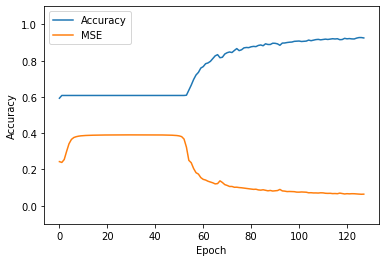

In [8]:
# print the accuracy of the model
spam_network_accuracy = spam_network.evaluate(X_test_mlp, y_test_mlp)[1]  # accuracy
print('Accuracy of the model is:', spam_network_accuracy)  # print accuracy

plt.plot(history_spam.history['accuracy'], label='Accuracy')  # plot accuracy
plt.plot(history_spam.history['mse'], label='MSE')  # plot MSE
plt.ylim([-0.1, 1.1])  # set y-axis limits
plt.legend()  # show legend
plt.xlabel('Epoch');  # label x-axis
plt.ylabel('Accuracy');  # label y-axis
plt.show()  # display plot

### Confusion Matrix:
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. The correct predictions can be seen on the downward diagonal and the misclassified labels are seen on the upward diagonal. 

In this specific case, since there are only two classifiers, a confusion matrix is not as helpful as in cases with multiple classifiers but one can still gather insight from one.

[Source of following code](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

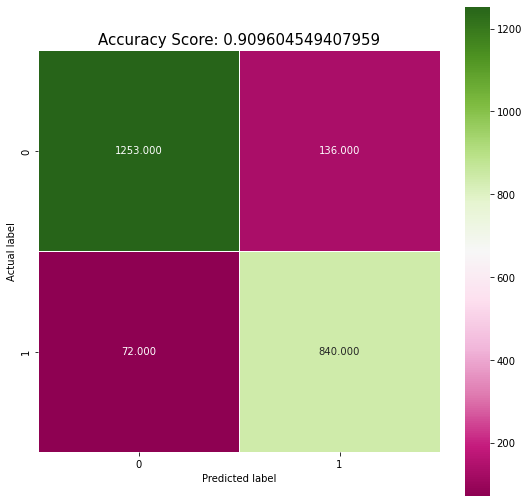

In [9]:
import seaborn as sns
from sklearn import metrics

y_pred_mlp = spam_network.predict(X_test_mlp)  # make predictions
y_pred_mlp = np.where(y_pred_mlp > 0.5, 1, 0)  # round predictions

spam_confusion_matrix = metrics.confusion_matrix(y_test_mlp, y_pred_mlp)  # get confusion matrix

plt.figure(figsize=(9,9))  # create figure with 9x9 inches 
sns.heatmap(spam_confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PiYG');  # plot heatmap
plt.ylabel('Actual label');  # label y-axis
plt.xlabel('Predicted label');  # label x-axis 
all_sample_title = 'Accuracy Score: {0}'.format(spam_network_accuracy)  # set title
plt.title(all_sample_title, size = 15);  # set title
plt.show()  # display plot

### Summary of the Model:

A summary of the generated classification model can be seen below.

In [10]:
spam_network.summary()  # print model summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 39)                2262      
_________________________________________________________________
dense_2 (Dense)              (None, 39)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


# Part 4: Binomial Logistic Regression

Since our dataset has two classifiers, spam or not-spam, a statistical analysis method to predict a binary outcome, such as binomial logistic regression is a great classification model to utilize.

The binomial logistic regression model is a classification model that provides probabilities. This is useful in the case of spam detection as the user can be informed of the probability behind the classification. Knowing that an Email has a 94% probability of being spam versus a 51% chance is very important to help reduce misclassified Email.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

log_reg = LogisticRegression(class_weight='balanced', penalty='l1', solver='saga', multi_class='ovr', n_jobs=4, max_iter=10000)  # create logistic regression model

log_reg.fit(X_train, y_train)  # fit the model

y_pred_reg = log_reg.predict(X_test)  # make predictions based on the model

pred_lreg_score = log_reg.score(X_test, y_test)  # get accuracy score
print('Logistic Regression accuracy is:', pred_lreg_score)  # logistic regression accuracy

Logistic Regression accuracy is: 0.7727075184702303


### Probability estimates

Since the problem set is dealing with spam it would be advantageous to display the accuracy of each prediction.

The following prediction classification probabilites are reported in the following format `[probability of not being spam, probability of being spam]`

It can be inferred from the histogram below that based on the dataset, this binomial logistic regression model is most commonly very confident in declaring 'not spam' with the highest frequency of classification of probability below 0.50 being at 0.0 whereas the model is declaring most of the as spam with only a probability of 0.59% and an average proability of around 0.65% which is lower than one would hope.

Predict probabilities: [[0.95354067 0.04645933]
 [0.71691561 0.28308439]
 [0.56005532 0.43994468]
 ...
 [0.59071191 0.40928809]
 [0.50428617 0.49571383]
 [0.67107748 0.32892252]]


Text(0.5, 1.0, 'Histogram of predicted probabilities')

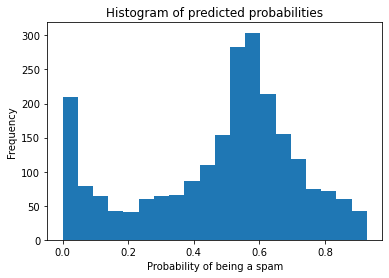

In [12]:
print('Predict probabilities:', log_reg.predict_proba(X_test))  # predict probabilities in format [probability of 0, probability of 1]

# graph the probability of a choice being made
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # get probabilities of 1
plt.hist(y_pred_prob, bins=20)  # plot histogram
plt.xlabel('Probability of being a spam')  # label x-axis
plt.ylabel('Frequency')  # label y-axis
plt.title('Histogram of predicted probabilities')  # set title

### Determining the confidence of each decision

The following histogram shows the confidence of each decision based on the decision function and boundary. Since this is a binomial problem, if the value is greater than 0 it will be defined as spam and if it is below 0 it will be defined as not spam. We can see that the confidence in declaring an email as 'not spam' is greater than that of decaring an email as spam since we are seeing values that stray a large distance negative whereas there is not much positive deviation.

Decision function: [-3.02160482 -0.92921307 -0.24138659 ... -0.36690916 -0.01714511
 -0.71306239]


Text(0.5, 1.0, 'Histogram of distances from decision boundary')

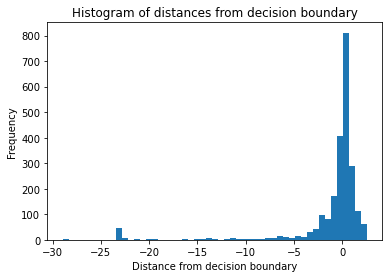

In [13]:
print('Decision function:', log_reg.decision_function(X_test))  # decision function in format [distance to 0, distance to 1]

# plot distance from decision boundary
y_pred_dist = log_reg.decision_function(X_test)  # get decision function
plt.hist(y_pred_dist, bins=51)  # plot histogram
plt.xlabel('Distance from decision boundary')  # label x-axis
plt.ylabel('Frequency')  # label y-axis
plt.title('Histogram of distances from decision boundary')  # set title

# Part 5: KNN Classifier

Out of curiosity, I wanted to see how well the K-Nearest Neighbor classifier would work on this dataset. First we will identify the best K value to use for the classification.

The nearest neighbor classifier is one of the simplest machine learning methods available.
Here's the simplest version of it:

For nearest neighbor classification we obtain the decision boundary by merging adjacent Voronoi cells that have the same label associated with them.

Since this problem resides in 57 dimensions, a 2D or 3D visualization is not possible.

> **Sources*
CS345 Machine Learning Foundations and Practice at Colorado State University: Module02_04_nearest_neighbors - created by Asa Ben-Hur and Ross Beveridge
<br> Some text referenced is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/)

We can begin by running a test to determine what the best K for the KNN is.

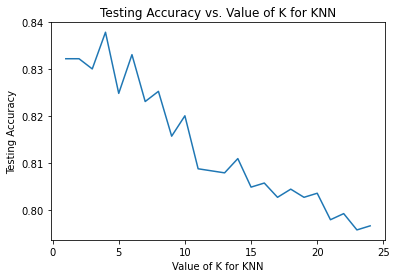

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,25)  # range of k values to try
k_scores = []  # list to store k scores
k_scores_list = []  # list to store k scores

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2, n_jobs=4)  # create KNN model
    knn.fit(X_train, y_train)  # fit the model
    y_pred_knn = knn.predict(X_test)  # make predictions based on the model
    k_scores.append(metrics.accuracy_score(y_test, y_pred_knn))  # get accuracy score
    k_scores_list.append(metrics.accuracy_score(y_test, y_pred_knn))  # get accuracy score

    
plt.plot(k_range, k_scores_list)  # plot k scores
plt.xlabel('Value of K for KNN')  # label x-axis
plt.ylabel('Testing Accuracy')  # label y-axis
plt.title('Testing Accuracy vs. Value of K for KNN')  # set title
plt.show()  # display plot


From the results it can be inferred that a K value of 4-5 is best for this particular dataset.

In [15]:
spam_neighbor = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski', p=2, n_jobs=4)  # create KNN model
spam_neighbor.fit(X_train, y_train)  # fit the model

pred_neighbors = spam_neighbor.predict(X_test)  # make predictions based on the model
pred_neighbors_score = spam_neighbor.score(X_test, y_test)  # get accuracy score
print('KNN accuracy is:', pred_neighbors_score)  # KNN accuracy

KNN accuracy is: 0.837896566710126


# Part 6: Support Vector Classifier

Using one of the most powerful linear classifiers, the Support Vector Machine, we can create a separating hyperplane classifier.

We can construct a hyperplane in a high- or infinite-dimensional space to be used for classification. Here we construct a SVM to attempt to create a classification model for the spam dataset. 

It can be seen that this method does not create a separation as well as the Neural net and KNN classifiers.

In [16]:
from sklearn.svm import SVC

X_reg = preprocessing.normalize(X)  # normalize data

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_reg, y, test_size=0.5, shuffle=True)  # split data into training and testing sets
spam_SVC = SVC(max_iter = -1, kernel='poly', class_weight='balanced', degree=5, probability=True)  # create SVC model
spam_SVC.fit(X_svm_train, y_svm_train)  # fit the model

pred_SVM = spam_SVC.predict(X_svm_test)  # make predictions based on the model
spam_SVM_score = spam_SVC.score(X_svm_test, y_svm_test)  # get accuracy score
print('SVM accuracy is:', spam_SVM_score)  # SVM accuracy

SVM accuracy is: 0.717948717948718


# Part 7: Principal Component Analysis

> **Sources*
CS345 Machine Learning Foundations and Practice at Colorado State University: Module02_05_nn_and_pca - created by Asa Ben-Hur and Ross Beveridge

There are many ways to introduce Principal Components Analysis.  Here we will choose a rather visual and hopefully intuitive way of seeing what it means for a dimension to be a principal component.

In particular, the first principal component has a ready explanation. It is the direction along which the sample variance of the data is largest.  To expand this sentence, consider all possible single dimension in a higher dimensional space. For all such dimensions the data may be projected onto that dimension and then the sample variance calculated.  Unless there are ties - equally good directions to choose from - then there will exist one unique direction that is better - higher variance - than all others. This is the first principal component

In [17]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

spam_pca = PCA(copy=True, iterated_power='auto', n_components=7, random_state=42)  # create PCA model
spam_pca.fit(X_train)  # fit the model
 
X_pca = spam_pca.transform(X_train)  # transform the data

fig = px.scatter(X_pca, x=X_pca[:,0], y=X_pca[:,1], color=y_train)   # plot the data
fig.show()  # display the plot of the first two components.


This graph is very interesting as it is letting us visualize a 57 dimensional problem in two dimensions. It can be seen that there is a visual decision boundary based on the two largest principal components. Attemping to separate this using a SVM proved to have lower accuracy than running SVM without PCA applied.

In [28]:
Xcps = spam_pca.components_  # get the principal components
Xcps.shape  # get the shape of the principal components

(7, 57)

In order to determine the right amount of prinicipal componenet to use we can use the explained variance ratio. 

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting. [Source](https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6#:~:text=The%20explained%20variance%20ratio%20is,or%2080%25%20to%20avoid%20overfitting.)

Here I added components one at a time until explained variance ratio of 80% was achieved.

In [30]:
spam_var_ratio = spam_pca.explained_variance_ratio_ # get the explained variance ratio
print('\n Total Variance Explained with 7 principal components:'
            , round(sum(list(spam_pca.explained_variance_ratio_))*100, 2))  # get total variance explained


 Total Variance Explained with 7 principal components: 82.46


We can see that the two classes are pretty distinct and fairly separable. We can conclude that the compressed data representation is most likely sufficient for a classification model. We can compare the variance in the overall dataset to what was captured from our seven primary components using .explained_variance_ratio_. 

Now let us also take a look at which features may be the most important for classification in the dataset by looking into a decision tree.

# Part 8: Decision Tree

Utilizing a decision tree can be quite elucidating when using a dataset with many features as it can bring to light the most important factors that lead to a classification. 

In the decision tree created below using the sklearn library, it can be seen that the number one deciding factor is whether or not a '$' is in the email. This makes sense since a large amount of spam mentions money whereas legitimate email oftentimes does not. It can also be seen that lack of the word HP in the Email increases the chances of the spam classification since the dataset was trained on HP company Emails.

With selecting a depth of two an accuracy of ~ 0.86 is acheived whereas not limiting the depth results in a depth of 23 and an accuracy of ~ 0.90 which is not significantly much better.

Test Set Accuracy is: 0.86


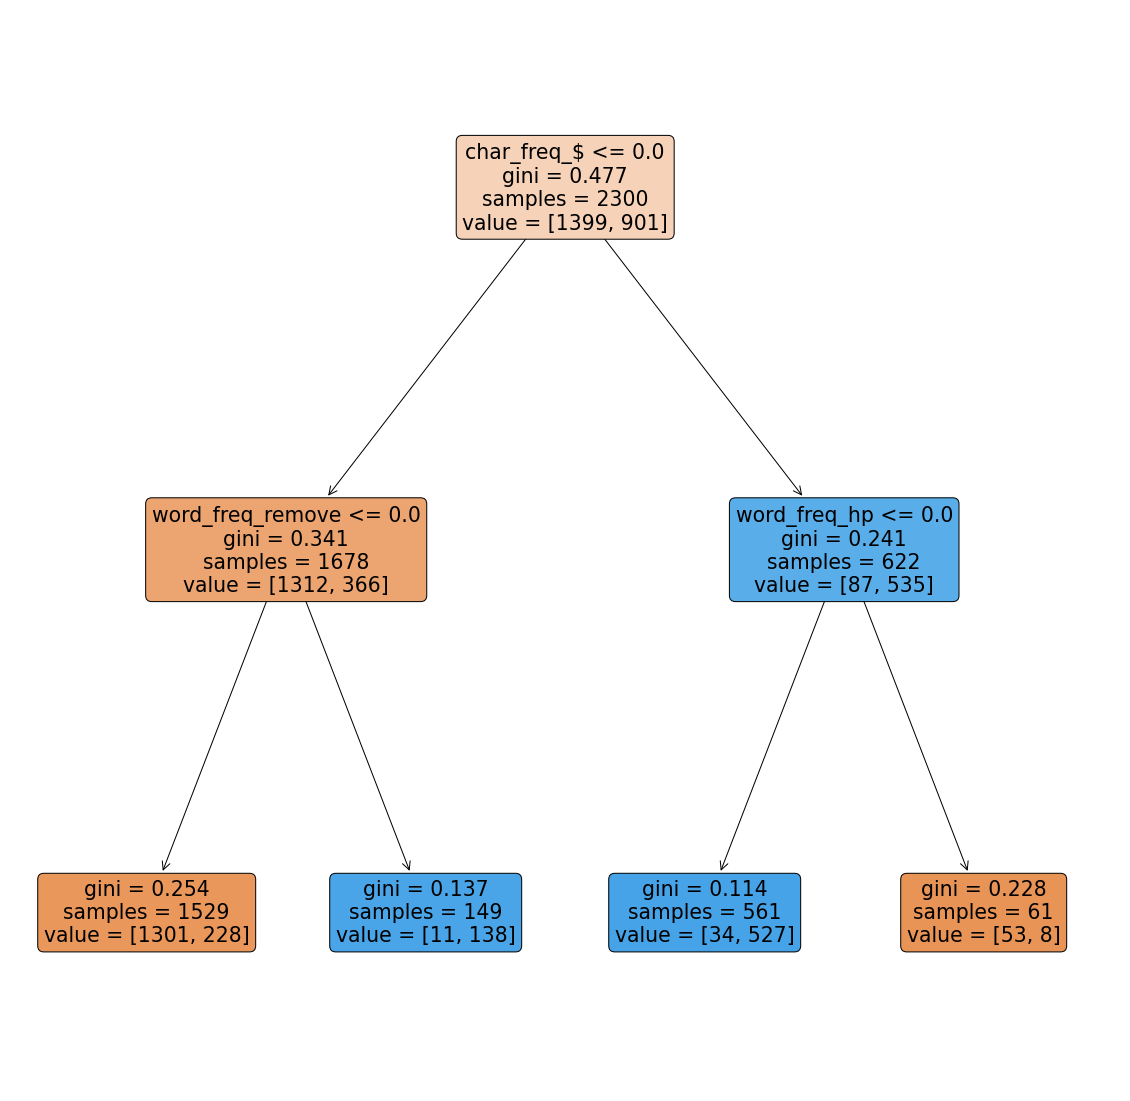

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

spam_tree = DecisionTreeClassifier(splitter="best", max_depth=2 , random_state=42)  # create the model
spam_tree.fit(X_train, y_train);  # fit the model

 
plt.figure(figsize=(20,20))  # create a figure of size 20x20
plot_tree(spam_tree, filled=True, rounded=True, feature_names=spam_features)  # plot the tree
plt.savefig('tree.pdf') # save the tree as a pdf
print(f'Test Set Accuracy is: {spam_tree.score(X_test,y_test):2.2f}')  # print the accuracy of the model
plt.show()  # display plot

Seeing the accuracy of just a depth of two makes one wonder what the accuracy would be with various depths. Below we see the code needed to plot the accuracy versus depth.

It can be seen that the accuracy, based on the train/test split, seems to form an asyptote at around an accuracy of 0.90. What is intersting is how fast the accuracy reaches this point. At around a depth of 3-4 the accuracy seems to hit a maximum value.

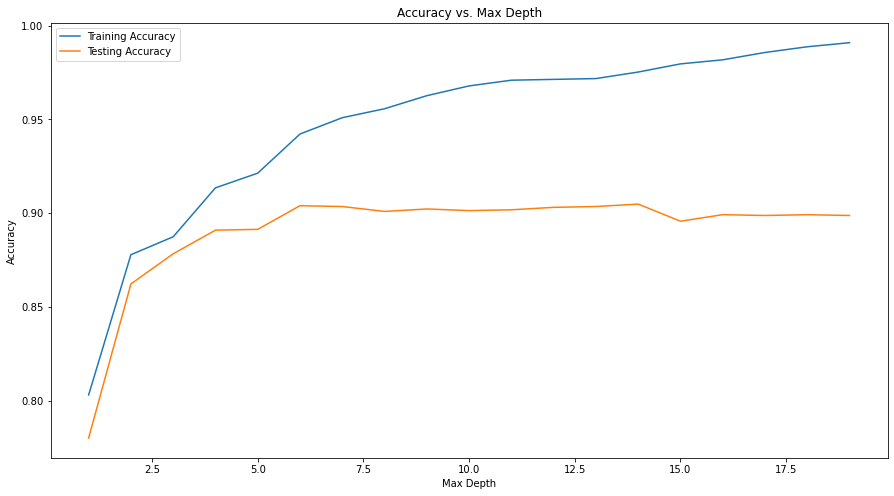

In [21]:
# plot the accuracy vs depth of the decision plot_tree
max_depth = range(1,20)  # range of max depth values to try
train_scores = []  # list to store training scores
test_scores = []  # list to store testing scores


for depth in max_depth:  # for each value of max depth
    spam_tree = DecisionTreeClassifier(splitter="best", max_depth=depth, random_state=42)  # create the model
    spam_tree.fit(X_train, y_train);  # fit the model
    train_scores.append(spam_tree.score(X_train, y_train))  # get training score
    test_scores.append(spam_tree.score(X_test, y_test))  # get testing score

plt.figure(figsize=(15,8))  # create a figure 
plt.plot(max_depth, train_scores, label='Training Accuracy')  # plot training scores
plt.plot(max_depth, test_scores, label='Testing Accuracy')  # plot testing scores
plt.legend()  # show legend
plt.xlabel('Max Depth')  # label x-axis
plt.ylabel('Accuracy')  # label y-axis
plt.title('Accuracy vs. Max Depth')  # set title
plt.show()  # display plot

# Part 9: Random Forest Classifier

The decision tree classifier above has shown a promising accuracy for classification of the spam dataset but we can do even better by taking advantage of the power of repeated trials with a random forest clasifier.

Random forests use decision trees as the base classifier and at each split in the decision tree, choose a subset of features from which to choose the split on.

> **Sources*
CS345 Machine Learning Foundations and Practice at Colorado State University: Module07_02_ensemble_methods - created by Asa Ben-Hur and Ross Beveridge

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

spam_forest = RandomForestClassifier()
spam_forest.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)   # create a cross-validation object

spam_tree_accuracy = cross_val_score(spam_tree, X_test, y_test, cv=cv, scoring='accuracy')  # get accuracy scores
print('Decision Tree Classifier Accuracy: ', np.mean(spam_tree_accuracy)) # print mean accuracy

spam_forest_accuracy = cross_val_score(spam_forest, X_test, y_test, cv=cv, scoring='accuracy') # get accuracy scores
print('Random Forest Classifier Accuracy: ' , np.mean(spam_forest_accuracy)) # print mean accuracy

#plot the accuracy of the classifiers
fig = go.Figure() # create a figure
fig.add_trace(go.Scatter(x=np.arange(1, len(spam_tree_accuracy)+1), y=spam_tree_accuracy, name='Decision Tree')) # add a scatter trace
fig.add_trace(go.Scatter(x=np.arange(1, len(spam_forest_accuracy)+1), y=spam_forest_accuracy, name='Random Forest')) # add a scatter trace
fig.update_layout(title='Accuracy of Classifiers', xaxis_title='Fold', yaxis_title='Accuracy') # set the title and axis titles
fig.show() # display the plot


Decision Tree Classifier Accuracy:  0.8839639724606243
Random Forest Classifier Accuracy:  0.9365462604923135


We can see that there is a boost in classification accuracy for the random forest classifer versus that of the decision tree. This accuracy is beats every other classification method we have tried thus far. 

# Part 10: Final Analysis / Conclusion

After investigating various classification models for the analysis of the spam dataset it was determined that the most accurate model found was the random forest classifier followed closely by the neural network classification model.

Below we can see the results of the various classification models for the analysis of the spam dataset compared by their accuracies on the test set.

In [32]:
# scatter plot all of the classifier accuracies

accuracies =[np.mean(spam_forest_accuracy), spam_network_accuracy, np.mean(spam_tree_accuracy), pred_lreg_score, spam_SVM_score]
labels = ['Random Forest', 'Neural Network', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine' ]

fig = px.bar(x=labels, y = accuracies, title="Accuracy of Each Classification Model on the UCI Spam Dataset", labels=dict(x="Classifiers", y="Accuracy"), log_y=True, color=[i for i in range(len(labels))])
fig.update_xaxes(type='category')
fig.show()

Let us explore why the random forest classifier performs better than the neural network model with our particular dataset.


A random forest classification model may be better than a neural net for classifying spam vs non-spam email when the attributes are soley word frequency and capital letter count because: 

* It can handle a large number of features: A random forest can handle thousands of features like word frequency, while a neural net may only be able to handle a few hundred. 
* It is not susceptible to overfitting: Overfitting is when a model memorizes the training data too well and does not generalize well to new data. This is a problem with neural nets, but not with random Forests. 
* It can handle missing data: If there is missing data in the training set, a random Forest can still build a model. This is not the case with neural nets.

Source: [3 Reasons to Use Random Forest Over a Neural Network](https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89)

Now when it comes to spam classification we really do no want to overfit our data since we want to be able to develop a model that can classify spam emails across domains. This dataset was taken specifically from HP so this dataset would not be suitable outside of the HP network but if we obtained a dataset that contained data points outside of HP we would want a model that can handle missing data and not overfit.

This is not to say that a neural net could not perform just as well as a random forest though as they can be trained on more complex patterns than a random forest. If rather than just accessing word frequencies we could train a model to tokenize entire emails and access various characteristics that a random forest would struggle with, for example:

- The email has a generic subject line that doesn't seem to be personalized
- The sender's address is often unfamiliar or includes strange characters
- The body of the email contains misspellings or odd grammar
- The email includes text urging the recipient to open an attachment or click a link
- The email urges you to act quickly or provides a sense of urgency

These advanced analytics would be better suited for a neural network and in my opinion are stronger indicators of spam than word frequency alone.

If I were to create a spam detection model I would first attempt to collect a dataset of known spam email and non-spam email from my personal inbox. I would then extract the email data such as "From, To, CC, BCC, Subject Line, Body, Attachments". I would then create features based on the tokenized data based and do research on the most reported red flags of spam email and ensure they are included in the attributes list. I am not elucidating exactly how I would create these attributes since this would be a very large part of the process and would involve data-wrangling, data-cleaning, and much more research. Presuming I have a useable dataset, I would then run the same tests as I performed in this document against my dataset and I would be very interested to see if the neural net performs better than the random forest.